Best solution: [ 0.97012637 -0.99447654], Fitness: 0.000922942357705507
GIF saved as 'firefly_optimization.gif'


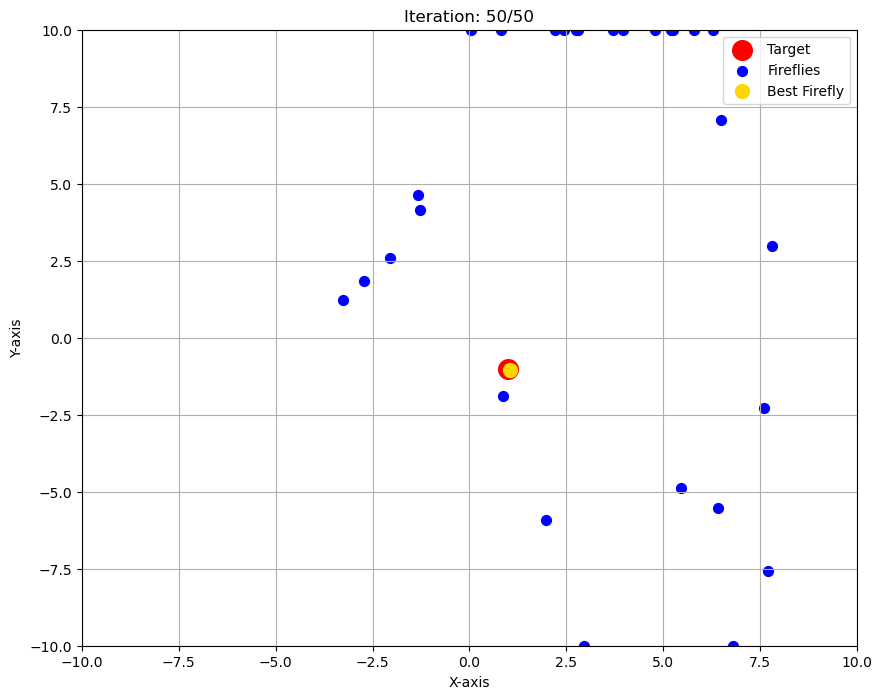

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
NUM_FIREFLIES = 30
NUM_ITERATIONS = 50
DIMENSIONS = 2
TARGET_ARRAY = np.array([1, -1])  # Target solution

# FA parameters
BETA = 1.0      # Attraction coefficient
GAMMA = 0.01    # Light absorption coefficient
ALPHA = 0.2     # Randomness factor

# Objective function (minimize distance to target)
def objective_function(x):
    return np.sum((x - TARGET_ARRAY) ** 2)

# Initialize fireflies
fireflies = np.random.uniform(low=-10, high=10, size=(NUM_FIREFLIES, DIMENSIONS))
brightness = np.array([objective_function(f) for f in fireflies])

# Store history for animation
history = [fireflies.copy()]

# Firefly Algorithm
for iteration in range(NUM_ITERATIONS):
    new_fireflies = fireflies.copy()
    for i in range(NUM_FIREFLIES):
        for j in range(NUM_FIREFLIES):
            if brightness[j] < brightness[i]:  # Firefly `j` is brighter (better)
                distance = np.linalg.norm(fireflies[i] - fireflies[j])
                attractiveness = BETA * np.exp(-GAMMA * distance ** 2)
                new_fireflies[i] += attractiveness * (fireflies[j] - fireflies[i]) 
                new_fireflies[i] += ALPHA * (np.random.rand(DIMENSIONS) - 0.5)  # Randomness
    
    # Update positions and brightness
    fireflies = np.clip(new_fireflies, -10, 10)
    brightness = np.array([objective_function(f) for f in fireflies])
    history.append(fireflies.copy())

# Find the best solution
best_idx = np.argmin(brightness)
best_solution = fireflies[best_idx]
print(f"Best solution: {best_solution}, Fitness: {brightness[best_idx]}")

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_title("Firefly Algorithm Optimization")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.grid(True)

# Plot target
target = ax.scatter(*TARGET_ARRAY, color='red', s=200, label='Target')

# Plot fireflies
firefly_scatter = ax.scatter([], [], color='blue', s=50, label='Fireflies')
best_scatter = ax.scatter([], [], color='gold', s=100, label='Best Firefly')

# Legend
ax.legend()

def update(frame):
    current_positions = history[frame]
    best_idx = np.argmin([objective_function(f) for f in current_positions])
    firefly_scatter.set_offsets(current_positions)
    best_scatter.set_offsets([current_positions[best_idx]])
    ax.set_title(f"Iteration: {frame + 1}/{NUM_ITERATIONS}")
    return firefly_scatter, best_scatter

# Create and save GIF
ani = FuncAnimation(fig, update, frames=NUM_ITERATIONS, interval=200, blit=True)
ani.save("firefly_optimization.gif", writer=PillowWriter(fps=10))
print("GIF saved as 'firefly_optimization.gif'")
plt.show()